<a href="https://colab.research.google.com/github/NjokiMbugua/Football-predictions/blob/main/DSC9_Independent_Project_Week_6_Njoki_Mbugua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Football Prediction

## Defining the question

### a. Specifying the question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

### b. Defining Metrics for success



*   Polynomial regression model
*   Logistic regression model



### c. Understanding the context

It will involve performing a background search to understand the data which will entail looking into football rankings to get a glimpse of how to go about the analysis.

### d. Recording the experimental design



*  Exploratory Data Analysis
*  Create polynomial and logistic models
*  Cross validation of the models






### e. Data Relevance

Cross-check whether is relevant to the topic of study and adequate enough to answer the research question.

# Importing the Libraries

In [1]:
# Import libraries
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as sp


# Reading the data

In [2]:
# Loading the datasets
rankings = pd.read_csv('/content/fifa_ranking.csv')
rankings.head()

rank country_full  ... confederation   rank_date
0     1      Germany  ...          UEFA  1993-08-08
1     2        Italy  ...          UEFA  1993-08-08
2     3  Switzerland  ...          UEFA  1993-08-08
3     4       Sweden  ...          UEFA  1993-08-08
4     5    Argentina  ...      CONMEBOL  1993-08-08

[5 rows x 16 columns]

In [3]:
results = pd.read_csv('/content/results.csv')
results.head()

date home_team away_team  ...     city   country neutral
0  1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1  1873-03-08   England  Scotland  ...   London   England   False
2  1874-03-07  Scotland   England  ...  Glasgow  Scotland   False
3  1875-03-06   England  Scotland  ...   London   England   False
4  1876-03-04  Scotland   England  ...  Glasgow  Scotland   False

[5 rows x 9 columns]

# Checking the datasets

In [4]:
#checking the datsets

In [5]:
# Checking the shape of the dataset
rankings.shape

(57793, 16)

In [6]:
# checking the data types
rankings.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [7]:
#
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [8]:
# Summary Statistics
rankings.describe()

rank  total_points  ...  three_year_ago_avg  three_year_ago_weighted
count  57793.000000  57793.000000  ...        57793.000000             57793.000000
mean     101.628086    122.068637  ...           59.173916                11.834811
std       58.618424    260.426863  ...          135.533343                27.106675
min        1.000000      0.000000  ...            0.000000                 0.000000
25%       51.000000      0.000000  ...            0.000000                 0.000000
50%      101.000000      0.000000  ...            0.000000                 0.000000
75%      152.000000     92.790000  ...           21.250000                 4.250000
max      209.000000   1775.030000  ...         1200.770000               240.150000

[8 rows x 12 columns]

In [9]:
# Shape of the dataset
results.shape

(40839, 9)

In [10]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [11]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [12]:
results.describe()

home_score    away_score
count  40839.000000  40839.000000
mean       1.745709      1.188105
std        1.749145      1.405120
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000

# Data cleaning

In [13]:
# checking for missing values
rankings.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [14]:
# checking for duplicates
rankings.duplicated().sum()

37

In [15]:
rankings.drop_duplicates()

rank country_full  ... confederation   rank_date
0         1      Germany  ...          UEFA  1993-08-08
1         2        Italy  ...          UEFA  1993-08-08
2         3  Switzerland  ...          UEFA  1993-08-08
3         4       Sweden  ...          UEFA  1993-08-08
4         5    Argentina  ...      CONMEBOL  1993-08-08
...     ...          ...  ...           ...         ...
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[57756 rows x 16 columns]

In [16]:
import datetime as dt

In [17]:
rankings.rank_date= pd.to_datetime(rankings.rank_date)

In [18]:
# Creating a year and month column from the datetime object
#
#Creating separate columns for the month and the year 
rankings['year'] = rankings.rank_date.dt.year
rankings['month'] = rankings.rank_date.dt.month

In [19]:
# Dropping irrelevant columns
rankings.drop(columns=['confederation','three_year_ago_weighted','three_year_ago_avg','two_year_ago_weighted',
                        'two_year_ago_avg','last_year_avg_weighted','last_year_avg','cur_year_avg_weighted',
                        'cur_year_avg','country_abrv'],inplace=True)

In [20]:
# Renaming columns
rankings.rename(columns = {'country_full':'country'}, inplace = True)

 Results dataset cleaning

In [21]:
# Checking for duplicates
results.duplicated().sum()

0

In [22]:
# missing values
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [23]:
# Dropping irrelevant columns
results.drop(columns=['city'],inplace=True)

In [24]:
#converting the rank_date to datetime
results.date = pd.to_datetime(results.date)

In [25]:
#Creating separate columns for the month and the year 
results['year'] = results.date.dt.year
results['month'] = results.date.dt.month

In [26]:
results.head(2)

date home_team away_team  home_score  ...   country neutral  year  month
0 1872-11-30  Scotland   England           0  ...  Scotland   False  1872     11
1 1873-03-08   England  Scotland           4  ...   England   False  1873      3

[2 rows x 10 columns]

# EDA using pandas profiling

In [108]:
# Using Pandas profiling to check the data and generate descpritive statistics
!pip install pandas-profiling==2.7.1
import pandas_profiling
prof = pandas_profiling.ProfileReport(df=rankings)
prof

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [109]:
# Using Pandas profiling to check the data and generate descpritive statistics
!pip install pandas-profiling==2.7.1
import pandas_profiling
prof = pandas_profiling.ProfileReport(df=results)
prof

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Merging the datasets

In [27]:
# merging the datasets
hometeam_rank = pd.merge(rankings, results, how = 'inner', left_on = ['year', 'month','country'], right_on = ['year', 'month','home_team'])
hometeam_rank.head(2)

rank country_x  ...  country_y  neutral
0     4    Sweden  ...     Sweden    False
1     4    Sweden  ...     Sweden    False

[2 rows x 16 columns]

In [28]:
#Drop irrelevant columns

hometeam_rank.drop(columns=['country_y','rank_date','date'], inplace=True)
#Rename certain columns

#hometeam_rank.country_x = hometeam_rank.rename({'country_x': 'country'}, axis = 1, inplace = True)

In [29]:
#Rename certain columns

hometeam_rank.rename({'country_x': 'country'}, axis = 1, inplace = True)
#hometeam_rank.country_x = hometeam_rank.rename({'rank': 'home_rank'}, axis = 1, inplace = True)

In [30]:
hometeam_rank.rename({'rank': 'home_rank'}, axis = 1, inplace = True)
hometeam_rank.head(2)

home_rank country  ...                    tournament  neutral
0          4  Sweden  ...                      Friendly    False
1          4  Sweden  ...  FIFA World Cup qualification    False

[2 rows x 13 columns]

In [31]:
#results + fifa_ranking = away_rank

awayteam_rank = pd.merge(rankings, results, how = 'inner', left_on = ['year', 'month','country'], right_on = ['year', 'month','away_team'])
awayteam_rank.head(2)

rank    country_x  ...  country_y  neutral
0     3  Switzerland  ...     Sweden    False
1     5    Argentina  ...       Peru    False

[2 rows x 16 columns]

In [32]:
#Drop irrelevant columns

awayteam_rank.drop(columns=['country_y','rank_date','date'], inplace=True)
#Rename certain columns

awayteam_rank.rename({'country_x': 'country'}, axis = 1, inplace = True)

In [33]:
awayteam_rank.rename({'rank': 'away_rank'}, axis = 1, inplace = True)
awayteam_rank.head(2)

away_rank      country  ...                    tournament  neutral
0          3  Switzerland  ...                      Friendly    False
1          5    Argentina  ...  FIFA World Cup qualification    False

[2 rows x 13 columns]

In [34]:
# Obtaining the final dataset
combined = pd.merge(hometeam_rank, awayteam_rank, how = 'inner', left_on = ['year', 'month','away_team'], right_on = ['year', 'month','away_team'])
combined.head(2)

home_rank country_x  ...                  tournament_y  neutral_y
0          4    Sweden  ...                      Friendly      False
1          4    Sweden  ...  FIFA World Cup qualification      False

[2 rows x 23 columns]

In [35]:
#Drop irrelevant columns

combined.drop(columns=['country_y','total_points_y','previous_points_y','rank_change_y','home_team_y','home_score_y','tournament_y','neutral_y'], inplace=True)
combined.head(1)

home_rank country_x  total_points_x  ...  neutral_x  away_rank  away_score_y
0          4    Sweden             0.0  ...      False          3             2

[1 rows x 15 columns]

In [36]:
combined.drop(columns=['away_score_y'],inplace=True)

In [37]:
combined.rename(columns={'home_team_x':'home_team','country_x':'country','total_points_x':'total_points','previous_points_x':'previous_points','month':'month','rank_change_x':'rank_change','home_score_x':'home_score','away_score_x':'away_score','tournament_x':'tournament','neutral_x':'neutral'}, inplace=True)
combined.head(2)

home_rank country  ...  neutral  away_rank
0          4  Sweden  ...    False          3
1          4  Sweden  ...    False         12

[2 rows x 14 columns]

In [38]:
combined.rename(columns={'MONTH':'month'},inplace=True)

In [39]:
combined.drop(columns=['total_points','previous_points','rank_change','neutral'],inplace=True)

In [40]:
combined.head(2)

home_rank country  year  ...  away_score                    tournament away_rank
0          4  Sweden  1993  ...           2                      Friendly         3
1          4  Sweden  1993  ...           1  FIFA World Cup qualification        12

[2 rows x 10 columns]

In [41]:
combined.isnull().sum()

home_rank     0
country       0
year          0
month         0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
away_rank     0
dtype: int64

In [42]:
combined.shape

(28518, 10)

In [43]:
combined.describe()

home_rank          year  ...    away_score     away_rank
count  28518.000000  28518.000000  ...  28518.000000  28518.000000
mean      78.456449   2006.196683  ...      1.100989     81.480574
std       51.079457      6.842606  ...      1.278697     52.538276
min        1.000000   1993.000000  ...      0.000000      1.000000
25%       35.000000   2000.000000  ...      0.000000     38.000000
50%       74.000000   2006.000000  ...      1.000000     76.000000
75%      114.000000   2012.000000  ...      2.000000    119.000000
max      209.000000   2018.000000  ...     15.000000    209.000000

[8 rows x 6 columns]

<Figure size 648x360 with 0 Axes>

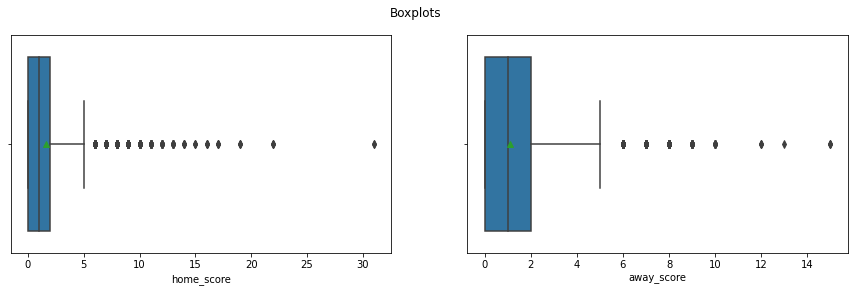

In [44]:
# Checking for outliers
fig = plt.figure(figsize= (9,5),edgecolor='lightgreen')
fig,(ax1,ax2) =plt.subplots(1,2, figsize=(15,4))
fig.suptitle('Boxplots')

sns.boxplot(data=combined,x=combined['home_score'],ax=ax1,showmeans=True)
sns.boxplot(data=combined,x=combined['away_score'],ax=ax2,showmeans=True)

# Feature engineering

In [45]:
#Create a new column final score which shows the goal difference between the home and away score.

combined['final_score'] = combined['home_score'] - combined['away_score']

def home_team(home_score):
    if home_score > 0:
        return 'Win'
    elif home_score < 0:
        return 'Loss'
    else:
        return 'Draw'
combined['status'] = combined.final_score.apply(lambda h: home_team(h))
combined.head(2)

home_rank country  year  ...  away_rank final_score status
0          4  Sweden  1993  ...          3          -1   Loss
1          4  Sweden  1993  ...         12           0   Draw

[2 rows x 12 columns]

In [46]:
#
combined.tournament.unique()

array(['Friendly', 'FIFA World Cup qualification',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'African Cup of Nations',
       'CFU Caribbean Cup qualification', 'UEFA Euro qualification',
       'CFU Caribbean Cup', 'Kirin Cup', 'FIFA World Cup', 'Baltic Cup',
       'Oceania Nations Cup qualification', 'Gulf Cup',
       'Simba Tournament', 'CECAFA Cup', 'Dynasty Cup', "King's Cup",
       'SAFF Cup', 'Copa Paz del Chaco', 'USA Cup', 'Korea Cup',
       'Copa América', 'Merdeka Tournament', 'South Pacific Games',
       'UNCAF Cup', 'Oceania Nations Cup', 'Windward Islands Tournament',
       'Gold Cup', 'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'AFF Championship', 'King Hassan II Tournament', 'AFC Asian Cup',
       'Cyprus International Tournament', 'Dunhill Cup', 'Nehru Cup',
       'COSAFA Cup', 'Tournoi de France', 'Confederations Cup',
      

In [47]:
# Specify tournament to category
#combined['tournament'] = combined['tournament'].astype('category')
def tournament(gametype):
    if gametype == 'Friendly':
        return 'Friendly'
    if (gametype == 'FIFA World Cup qualification') or (gametype == 'FIFA World Cup'):
        return 'World cup'
    else:
        return 'Other'
      
combined['gametype'] = combined['tournament'].apply(lambda w: tournament(w))

In [48]:
combined.head(2)

home_rank country  year  month  ... away_rank final_score  status   gametype
0          4  Sweden  1993      8  ...         3          -1    Loss   Friendly
1          4  Sweden  1993      8  ...        12           0    Draw  World cup

[2 rows x 13 columns]

In [49]:
combined.drop(columns=['tournament'],inplace=True)

In [50]:
combined.head(2)

home_rank country  year  month  ... away_rank final_score  status   gametype
0          4  Sweden  1993      8  ...         3          -1    Loss   Friendly
1          4  Sweden  1993      8  ...        12           0    Draw  World cup

[2 rows x 12 columns]

# Checking for multicollinearity

In [51]:
#
corr = combined.corr()
corr

home_rank      year     month  ...  away_score  away_rank  final_score
home_rank     1.000000  0.092840  0.068282  ...    0.221202   0.514813    -0.211221
year          0.092840  1.000000 -0.007457  ...   -0.012682   0.092347    -0.031365
month         0.068282 -0.007457  1.000000  ...    0.019761   0.068660     0.002744
home_score   -0.115309 -0.052746  0.019208  ...   -0.160963   0.307034     0.824679
away_score    0.221202 -0.012682  0.019761  ...    1.000000  -0.151864    -0.690969
away_rank     0.514813  0.092347  0.068660  ...   -0.151864   1.000000     0.311912
final_score  -0.211221 -0.031365  0.002744  ...   -0.690969   0.311912     1.000000

[7 rows x 7 columns]

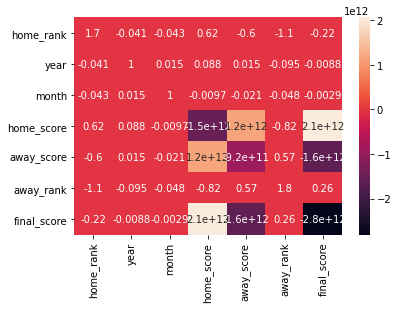

<Figure size 1152x720 with 0 Axes>

In [52]:
#computing the VIF(which is the inverse of the correlation matrix)
VIF_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
sb.heatmap(VIF_df, annot = True)
plt.figure(figsize = (16, 10))
plt.show()

In [53]:
# Correlations between the variables of interest
corr = combined[['home_score','away_score','home_rank','away_rank']].corr()
corr

# The correlations are close to zero thus there is no multicollinearity.

home_score  away_score  home_rank  away_rank
home_score    1.000000   -0.160963  -0.115309   0.307034
away_score   -0.160963    1.000000   0.221202  -0.151864
home_rank    -0.115309    0.221202   1.000000   0.514813
away_rank     0.307034   -0.151864   0.514813   1.000000

The correlations are close to zero thus there is no multicollinearity.

# Polynomial Regression

## Predicting the home score

In [54]:
# First import the libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [55]:
combined.head(2)

home_rank country  year  month  ... away_rank final_score  status   gametype
0          4  Sweden  1993      8  ...         3          -1    Loss   Friendly
1          4  Sweden  1993      8  ...        12           0    Draw  World cup

[2 rows x 12 columns]

In [56]:
# Selecting columns relevant to the reasearch question
#
homescore = combined[['home_team',	'away_team',	'home_score',	'away_score', 'home_rank', 'away_rank']]
homescore.head()

home_team    away_team  home_score  away_score  home_rank  away_rank
0     Sweden  Switzerland           1           2          4          3
1     Sweden       France           1           1          4         12
2  Argentina         Peru           2           1          5         70
3  Argentina         Peru           2           1          5         70
4  Argentina         Peru           2           1          5         70

In [57]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
combined ['gametype'] = labelencoder.fit_transform(combined['gametype'])


In [58]:
# Creating X and y labels
#X = combined.iloc[:,[0,1,3,4,5,6]]
X = homescore.drop(['home_score'],axis=1)
y = homescore.home_score

In [59]:
# Encoding the categorical variables by getting dummies
X = pd.get_dummies(X, drop_first=True)

In [60]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [61]:
# Scaling our Data
# ---
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
#Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [63]:
# Training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_pred = regressor.predict(X_test)

In [65]:
# Measuring the accuracy of the model
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.3757452726560053


## Crossvalidation

In [66]:
homescore.head(0)

Empty DataFrame
Columns: [home_team, away_team, home_score, away_score, home_rank, away_rank]
Index: []

In [67]:
from sklearn.model_selection import KFold

In [68]:
X = homescore[['home_rank','away_rank','away_score']].values
y = homescore['home_score'].values

In [69]:
folds = KFold(n_splits=5)
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

we are using 5 folds


In [70]:
# create and assess 5 models based on the folds we created.
RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))


Training model 1

Training model 1

Training model 1

Training model 1

Training model 1


In [71]:
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

In [72]:
 # fit a model accordingly
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  #print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  #count = count + 1

In [74]:
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

Model 1 Root Mean Squared Error: 1.3461734037128785


In [75]:
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

Model 2 Root Mean Squared Error: 1.3461734037128785


In [76]:
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

Model 3 Root Mean Squared Error: 1.3461734037128785


In [77]:
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

Model 4 Root Mean Squared Error: 1.3461734037128785


In [78]:
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

Model 5 Root Mean Squared Error: 1.3461734037128785


In [79]:
# Printing the mean of the RMSEs
np.mean(RMSES)

1.3461734037128785

The mean RMSE is 1.34 which fairly close to our mean for the model (1.37) thus the model can be considered  to be fairly accurate at predicting the home scores.


## Residual plots

In [80]:
# creating the residual by substracting the test value from the predicted value for each row in our dataset
from sklearn import metrics
residuals = y_pred-y_test
#residuals = np.subtract(admit_predict, admit_test)
# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()


0.17181125069032038

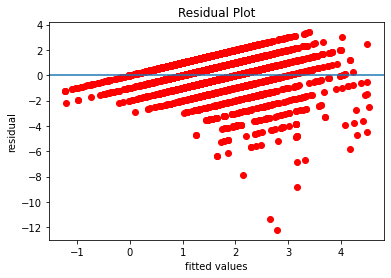

In [81]:
# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='red')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline()
plt.show()

Most of the residuals are centered fairly around the mean which means the model is fairly good at predicting the home scores.

## Assessing heteroscedasticity using Bartlett’s test

In [82]:
import scipy as sp

# Performing the barlett's test
test_result, p_value = sp.stats.bartlett(y_pred, residuals)
#test_result, p_value = sp.stats.bartlett(y_pred, residuals)

In [86]:
# Calculating the critical value of the chi squared distribution, to compare it with the test_result
#
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)
#critical_value

In [85]:
# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


The variances are homogenous which implies the model is quite good.

## Predicting the away score

In [87]:
combined.head(2)

home_rank country  year  month  ... away_rank final_score  status  gametype
0          4  Sweden  1993      8  ...         3          -1    Loss         0
1          4  Sweden  1993      8  ...        12           0    Draw         2

[2 rows x 12 columns]

In [88]:
# Selecting columns relevant to the reasearch question
#
awayscore = combined[['home_team',	'away_team',	'home_score',	'away_score', 'home_rank', 'away_rank']]
awayscore.head()

home_team    away_team  home_score  away_score  home_rank  away_rank
0     Sweden  Switzerland           1           2          4          3
1     Sweden       France           1           1          4         12
2  Argentina         Peru           2           1          5         70
3  Argentina         Peru           2           1          5         70
4  Argentina         Peru           2           1          5         70

In [89]:
# Creating X and y labels

X = awayscore.drop(['away_score'],axis=1)
y = awayscore.away_score

In [90]:
# Encoding the categorical variables by getting dummies
X = pd.get_dummies(X, drop_first=True)

In [91]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [92]:
# Scaling our Data
# ---
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
#Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [94]:
# Training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
y_pred = regressor.predict(X_test)

In [96]:
# Measuring the accuracy of the model
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.1140478411355357


## Logistic regression

In [97]:
combined.head(2)

home_rank country  year  month  ... away_rank final_score  status  gametype
0          4  Sweden  1993      8  ...         3          -1    Loss         0
1          4  Sweden  1993      8  ...        12           0    Draw         2

[2 rows x 12 columns]

In [98]:
# Selecting columns relevant to the reasearch question
#
homescore = combined[['home_team',	'away_team',	'home_score',	'away_score', 'home_rank', 'away_rank','status','gametype']]
homescore.head()

home_team    away_team  home_score  ...  away_rank  status  gametype
0     Sweden  Switzerland           1  ...          3    Loss         0
1     Sweden       France           1  ...         12    Draw         2
2  Argentina         Peru           2  ...         70     Win         2
3  Argentina         Peru           2  ...         70     Win         2
4  Argentina         Peru           2  ...         70     Win         2

[5 rows x 8 columns]

In [99]:
# Spliting the data into features and the target variable
#
X = combined.drop('status', axis = 1)
y = combined.status

In [100]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
combined ['status'] = labelencoder.fit_transform(combined['status'])


In [101]:
# Encoding the categorical features
#
X = pd.get_dummies(X, drop_first=True)

In [102]:
# Spliting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [103]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
# Making predictions
#
y_pred = logistic.predict(X_test)

In [105]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[2005,   51,   13],
       [   0, 2441,    0],
       [   3,    0, 4043]])

In [106]:
# Measuring the accuracy of the model
#
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')

The accuracy of the model is 0.9921692379616643


The accuracy of the model is 99% thus it can be deemed as fairly good for predicting wins and losses.